# HW7
We load and split the [USArrests dataset](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests).

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

data = pd.read_csv("usarrests.csv", index_col=0)

# Features for use in clustering.
X = data[["Murder", "Assault", "UrbanPop", "Rape"]]

# For whitening datasets for KMeans clustering.
whitener = PCA(whiten=True)

# Split into training and validation sets.
X_train, X_val = train_test_split(X, random_state=0)

# Whiten.
X_train = whitener.fit_transform(X_train)
X_val = whitener.transform(X_val)

Fit KMeans clusters to the training set for K in [2, 10] using a `random_state` of `0`. Plot the training inertias as a function of K. In a separate figure, plot the validation inertias as a function of K.

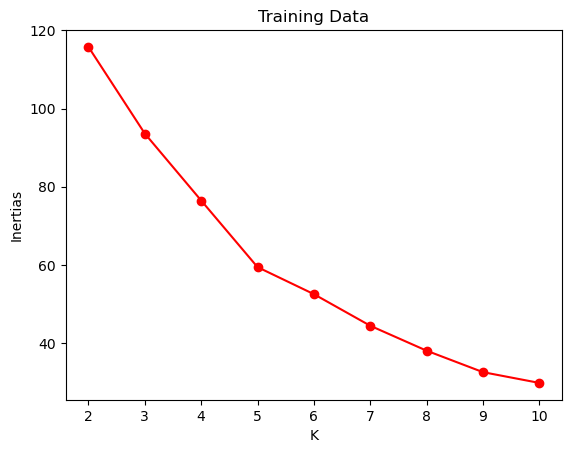

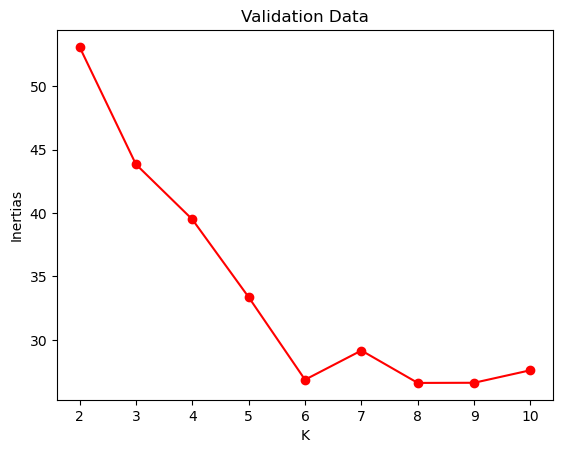

In [123]:
import warnings
warnings.filterwarnings('ignore', message='Kmeans') 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
klist = []
ilist = []
vpred = []
cen=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    km=kmeans.fit(X_train)
    v=km.predict(X_val)
    vpred.append(v)
    klist.append(k)
    ilist.append(km.inertia_)
    cen.append(km.cluster_centers_)
plt.plot(klist,ilist,'o-',color="red")
plt.title("Training Data")
plt.xlabel("K")
plt.ylabel("Inertias")
plt.show()
def inertia(X_val, vlist): 
    lst=[]
    for i in range(X_val.shape[0]):
        lst.append(np.sum((X_val[i] - vlist[i])**2))
    return sum(lst)
res=[]
for i in range(len(vpred)):
    vlist=[]
    for j in vpred[i]:
        vlist.append(cen[i][j])
    res.append(inertia(X_val,vlist))

plt.plot(klist,res,'o-',color="red")
plt.title("Validation Data")
plt.xlabel("K")
plt.ylabel("Inertias")
plt.show()

Based on the training plot, what value of K would the elbow method recommend selecting? Explain.

### Answer: The optimal K is 5. This is because after K=5, the inertia, which is the sum of squared distances of samples to their closest cluster center, starts decreasing in a linear fashion, and according to the elbow method, K=5 is the optimal point.

Justify the elbow method based on the validation plot.

### Answer: From the validation plot, we choose the optimal K as 5. Because when K=6, the intertia is way too low that might indicates an overfitting, so we need to pick the K before overfitting which is 5. K=5 is the same as the optimal K we chose in the training plot, thus, justified the elbow method.